In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import gc
from sklearn import preprocessing
%matplotlib inline

In [2]:
def upload_file(fname):
    data = pd.read_csv("Our Dataset/" + fname + ".csv",  index_col=False)
    return data

In [3]:
def make_columns():
    newCols = []
    for col in electrodes:
        for i in range(192):
            newCols.append(col + '.' + str(i))
    newCols.append('y')
    return newCols

In [101]:
def number_of_events():
    neg = 0
    zero = 0
    one = 0
    two = 0
    three = 0
    for i in range(len(data)):
        if(data["y"][i] == 0):
            zero+=1
        elif(data["y"][i] == 1):
            one+=1
        elif(data["y"][i] == -1):
            neg +=1
        elif(data["y"][i] == 2):
            two+=1
        elif(data["y"][i] == 3):
            three+=1
    print(neg)
    print(zero)
    print(one)
    print(two)
    print(three)

In [57]:
def convert_to_row(start, label):
    row = []
    for col in electrodes:
        row += data[col][start:start+192].tolist()
    row += [label]
    return row

In [59]:
def positive_events():
    posDfs = pd.DataFrame(columns = newCols)
    indices = []
    j = 0
    while j < (len(y)):
        #assume positive events are: pedestrian, dog, collision, and leadning car brake
        if (y[j] != 0):
            if (j+192 < len(y) and check_if_driver_brake(j)):
                posDfs.loc[len(posDfs)] = convert_to_row(j, 1)
                indices.append(j)
                j += 384 #192*2
            else:
                j+=1
        else:
            j += 1
    return posDfs, indices  

In [68]:
def check_if_driver_brake(start_stim):
    for i in range(start_stim,start_stim+192):
        if(data["Brake Pedal"][i] == 1):
            return True
    return False

In [67]:
def negative_events(indices):
    negDfs = pd.DataFrame(columns = newCols)
    j = 0
    while j < (len(y)):
        if(len(indices) > 0 and j <= indices[0] and j+192 > indices[0]):
            j = indices[0] + 384
            indices.pop(0)
        elif(j+192 < len(y)):
            negDfs.loc[len(negDfs)] = convert_to_row(j, 0)
            j += 192
        else:
            break
    return negDfs

## Wagih

In [31]:
fnames = ["Subject_1", "Subject_2", "Subject_3", "Subject_4"]

In [44]:
data = upload_file("wagih/Subject")

In [45]:
data = data.drop("COUNTER", axis = 1)

In [48]:
for f in fnames:
    d = upload_file("Mohamed Wagih/" + f)
    d = d.drop("COUNTER", axis = 1)
    data = data.append(d, ignore_index=True)

In [102]:
number_of_events()

3112
62251
1844
675
0


In [52]:
electrodes = data.columns.drop(["Brake Pedal", "y"])
newCols = make_columns()

In [54]:
electrodes

Index(['F3', ' FC5', ' AF3', ' F7', ' T7', ' P7', ' O1', ' O2', ' P8', ' T8',
       ' F8', ' AF4', ' FC6', ' F4'],
      dtype='object')

In [61]:
y = data["y"]

In [62]:
posDfs, indices = positive_events()
negDfs = negative_events(indices)

0
192
384
576
768
960
1152
1344
1536
1728
1920
2112
2304
2496
2688
2880
3072
3264
3456
3648
3840
4032
4224
4416
4608
4800
4992
5184
5376
5568
5760
5952
6144
6336
6528
6720
6912
7104
7296
7488
7680
7872
8064
8256
8448
8640
8832
9024
9216
9408
9600
9792
9984
10176
10368
10560
10752
10944
11136
11328
11520
11712
11904
12096
12288
12480
12672
12864
13056
13248
13440
13632
13824
14016
14208
14400
14592
14784
14976
15168
15360
15552
15744
15936
16128
16320
16512
16704
16896
17088
17280
17472
17664
17856
18048
18240
18432
18624
18816
19008
19200
19392
19584
19776
19968
20160
20352
20544
20736
20928
21120
21312
21504
21696
21888
22080
22272
22464
22656
22848
23040
23232
23424
23616
23808
24000
24192
24384
24576
24768
24960
25152
25344
25536
25728
25920
26112
26304
26496
26688
26880
27072
27264
27456
27648
27840
28032
28224
28416
28608
28800
28992
29184
29376
29568
29760
29952
30144
30336
30528
30720
30912
31104
31296
31488
31680
31872
32064
32256
32448
32640
32832
33024
33216
33408
33600
33792

In [104]:
len(posDfs)

9

In [103]:
len(negDfs)

333

In [65]:
posDfs.to_csv("Our Dataset/Mohamed Wagih/pos.csv")

In [66]:
negDfs.to_csv("Our Dataset/Mohamed Wagih/nge.csv")

In [99]:
def draw_signals():
    meanPos = preprocessing.scale(np.mean(posDfs.drop("y", axis = 1)))
    meanNeg = preprocessing.scale(np.mean(negDfs.drop("y", axis = 1)))
    cols = list(posDfs)
    for i in range(14):
        name = cols[i*192].split('.')[0]
        plt.ylim(-10, 25)
        plt.title("wagih: " + name, fontsize=16, fontweight='bold')
        plt.plot(meanPos[i*192:i*192+192], label="Braking Event")
        plt.plot(meanNeg[i*192:i*192+192], label="Normal Driving")
        plt.legend()
        plt.show()
    return meanPos, meanNeg

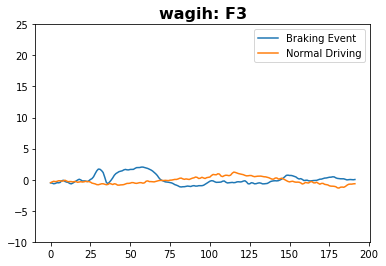

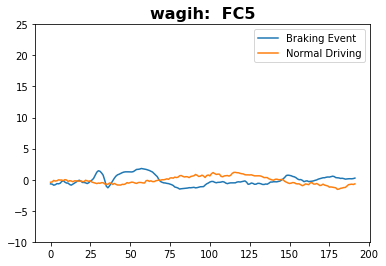

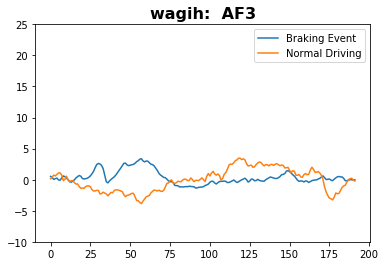

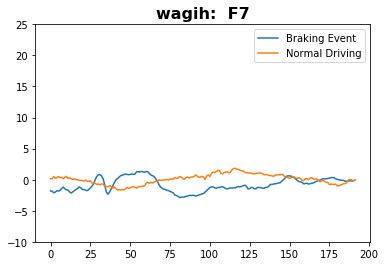

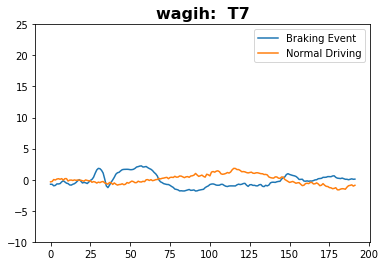

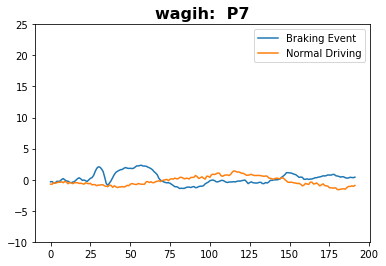

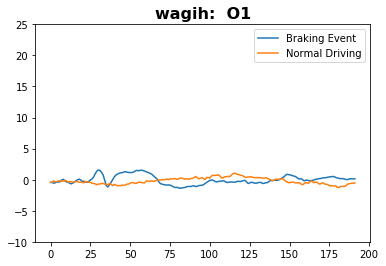

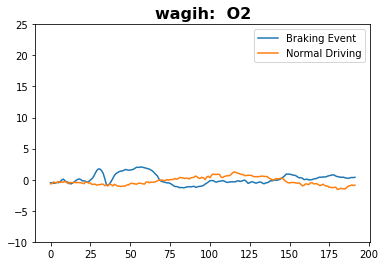

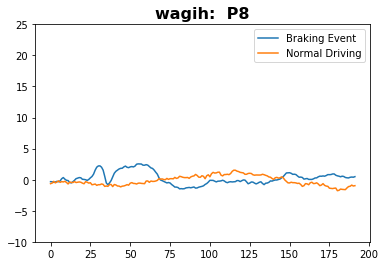

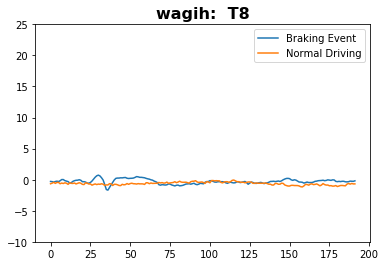

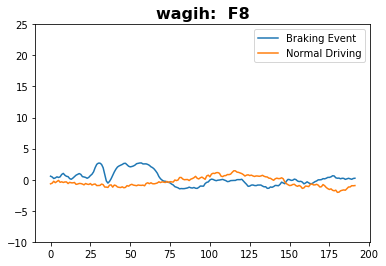

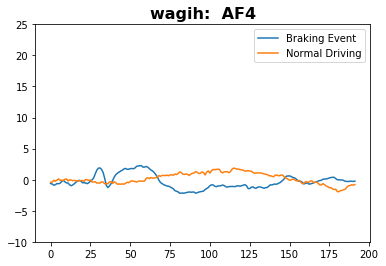

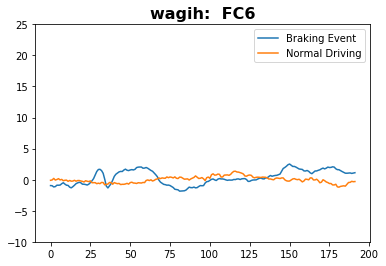

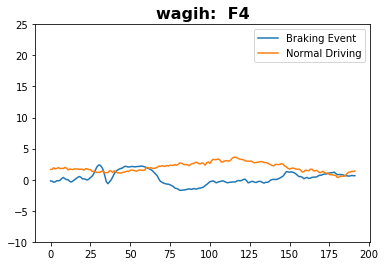

In [100]:
meanPos, meanNeg = draw_signals()

## Mohamed EL-Tair

In [111]:
fnames = ["Subject_1", "Subject_2", "Subject_3", "Subject_4", "Subject_5", "Subject_6", "Subject_7", "Subject_8",
          "Subject_9", "Subject_10", "Subject_11"]

In [107]:
data = upload_file("Mohamed EL-Tair/Subject")

In [108]:
data = data.drop("COUNTER", axis = 1)

In [112]:
for f in fnames:
    d = upload_file("Mohamed EL-Tair/" + f)
    d = d.drop("COUNTER", axis = 1)
    data = data.append(d, ignore_index=True)

In [113]:
number_of_events()

2076
58823
5193
841
0


In [114]:
y = data["y"]

In [115]:
posDfs, indices = positive_events()
negDfs = negative_events(indices)

In [116]:
len(posDfs)

25

In [117]:
len(negDfs)

292

In [119]:
posDfs.to_csv("Our Dataset/Mohamed EL-Tair/pos.csv")

In [120]:
negDfs.to_csv("Our Dataset/Mohamed EL-Tair/neg.csv")

In [123]:
def draw_signals():
    meanPos = preprocessing.scale(np.mean(posDfs.drop("y", axis = 1)))
    meanNeg = preprocessing.scale(np.mean(negDfs.drop("y", axis = 1)))
    cols = list(posDfs)
    for i in range(14):
        name = cols[i*192].split('.')[0]
        plt.ylim(-10, 25)
        plt.title("Mohamed EL-Tair: " + name, fontsize=16, fontweight='bold')
        plt.plot(meanPos[i*192:i*192+192], label="Braking Event")
        plt.plot(meanNeg[i*192:i*192+192], label="Normal Driving")
        plt.legend()
        plt.show()
    return meanPos, meanNeg

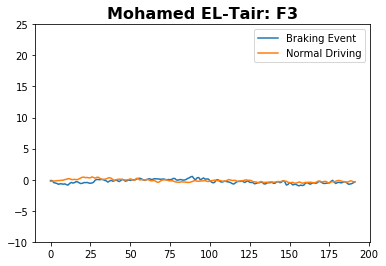

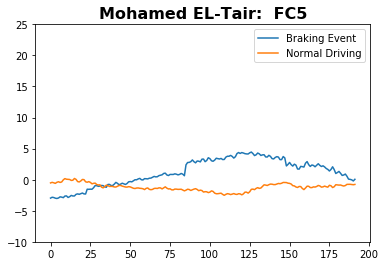

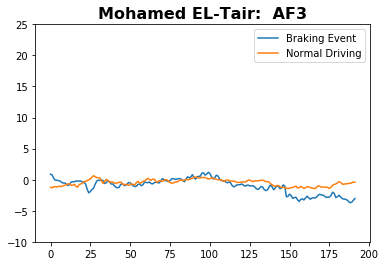

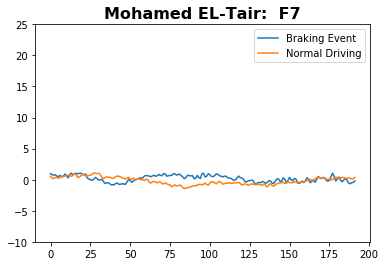

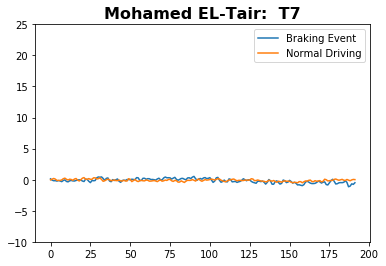

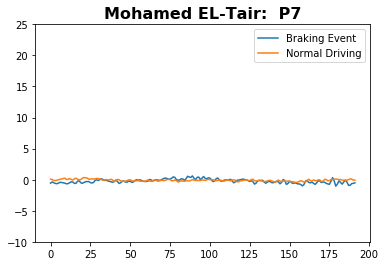

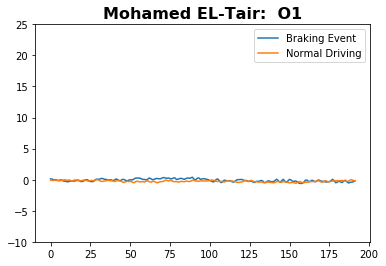

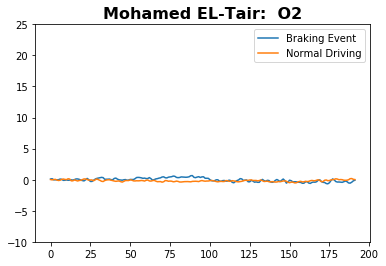

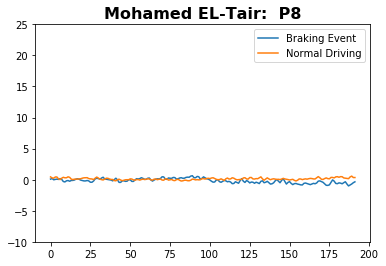

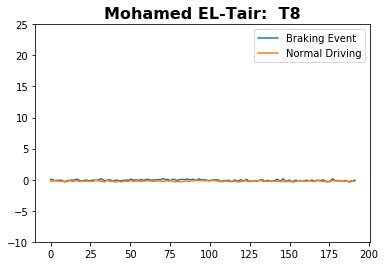

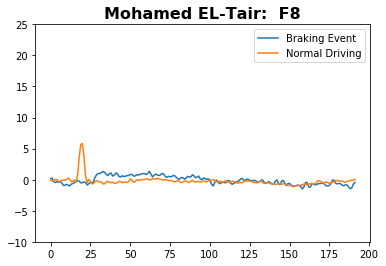

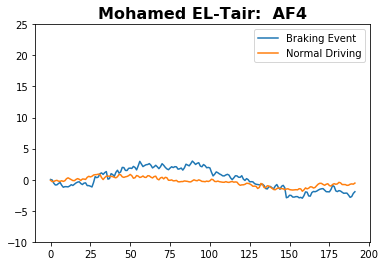

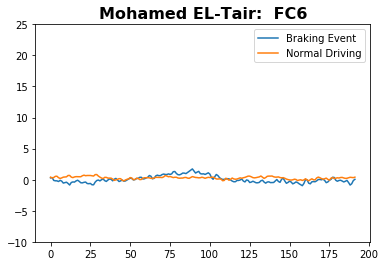

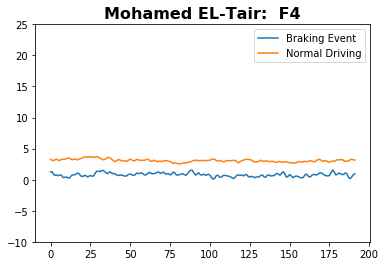

In [124]:
meanPos, meanNeg = draw_signals()

## Hesham

In [125]:
fnames = ["Subject_1", "Subject_2", "Subject_3", "Subject_4", "Subject_5", "Subject_6", "Subject_7"]

In [126]:
data = upload_file("Hesham/Others/Subject")

In [127]:
data = data.drop("COUNTER", axis = 1)

In [128]:
for f in fnames:
    d = upload_file("Hesham/Others/" + f)
    d = d.drop("COUNTER", axis = 1)
    data = data.append(d, ignore_index=True)

In [129]:
number_of_events()

1310
42229
2218
511
0


In [130]:
y = data["y"]

In [131]:
posDfs, indices = positive_events()
negDfs = negative_events(indices)

In [132]:
len(posDfs)

16

In [133]:
len(negDfs)

203

In [136]:
def draw_signals():
    meanPos = preprocessing.scale(np.mean(posDfs.drop("y", axis = 1)))
    meanNeg = preprocessing.scale(np.mean(negDfs.drop("y", axis = 1)))
    cols = list(posDfs)
    for i in range(14):
        name = cols[i*192].split('.')[0]
        plt.ylim(-10, 25)
        plt.title("Hesham: " + name, fontsize=16, fontweight='bold')
        plt.plot(meanPos[i*192:i*192+192], label="Braking Event")
        plt.plot(meanNeg[i*192:i*192+192], label="Normal Driving")
        plt.legend()
        plt.show()
    return meanPos, meanNeg

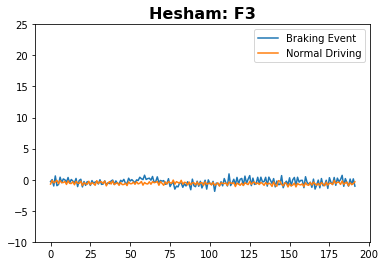

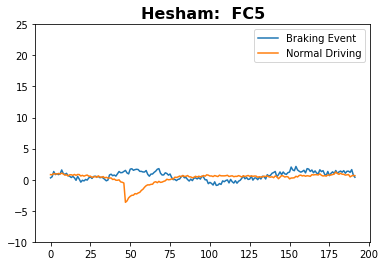

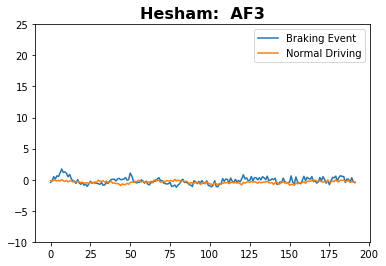

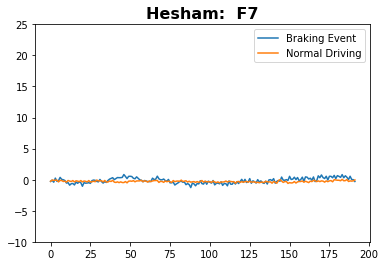

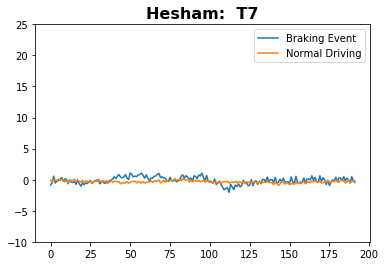

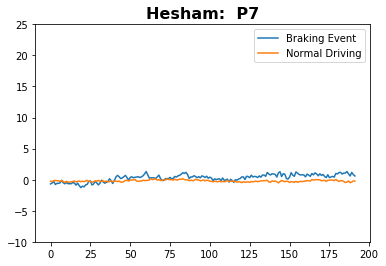

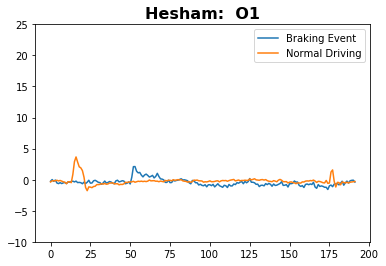

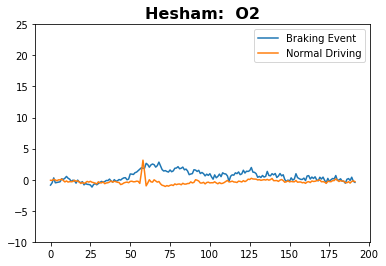

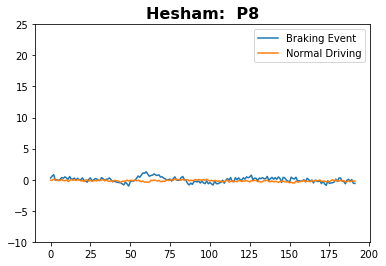

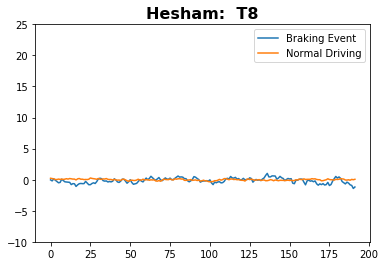

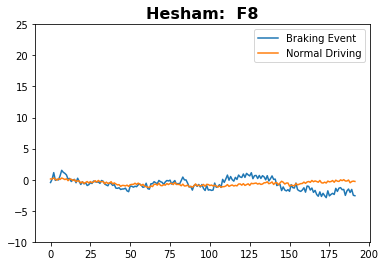

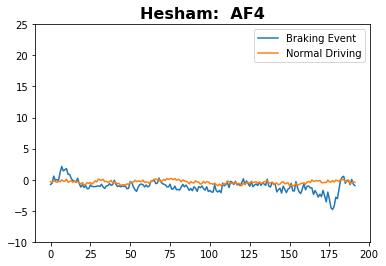

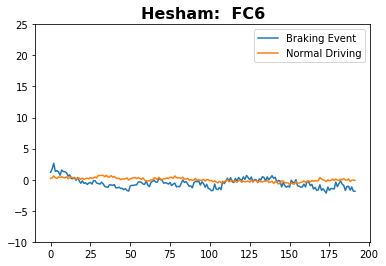

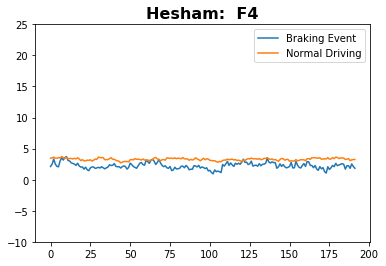

In [137]:
meanPos, meanNeg = draw_signals()